In [21]:
# %pip install sslbookdata
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas


In [22]:
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.sparse as sp

import sslbookdata

O que eu tenho que fazer:
Datasets utilizaveis: USPS, COIL2, DIGIT-1, G-241C, G-241N e TEXT

1) Construi grafos com duas etapas:
* Shared Nearest Neighbour (Construção de grafo de adjacência)
* Jaccard / Cosseno (Geração de matriz ponderada)

2) Construção dos grafos usando um método baseado em densidade criando uma árvore geradora mínima

3) Implementar os métodos de aprendizado (Label difusion) que foram:
* GRF (Gaussian Random Fields)
* LGC (Local and GLobal Consistency)
* LapRLS (Laplacian Regularized Least Squares)
* LapSVM (Laplacian Support Vector Machine)
* RMGT (Robust Multi-class Graph Transductio)

In [23]:
datasets = {
    'USPS': sslbookdata.load_usps(0),
    'COIL': sslbookdata.load_coil2(0),
    'DIGIT': sslbookdata.load_digit1(0),
    'GC': sslbookdata.load_g241c(0),
    'GN': sslbookdata.load_g241n(0)
    # 'TEXT': sslbookdata.load_text(0)
}

Processando dataset: USPS


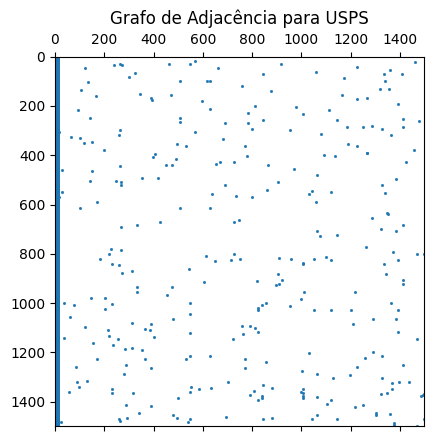

Processando dataset: COIL


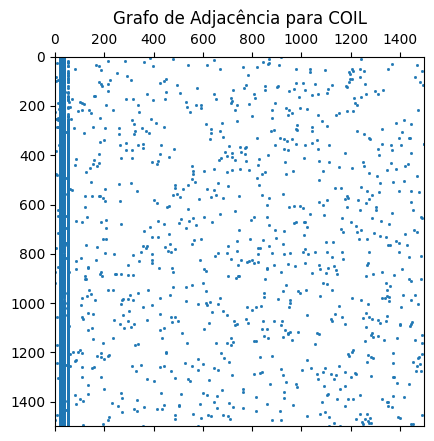

Processando dataset: DIGIT


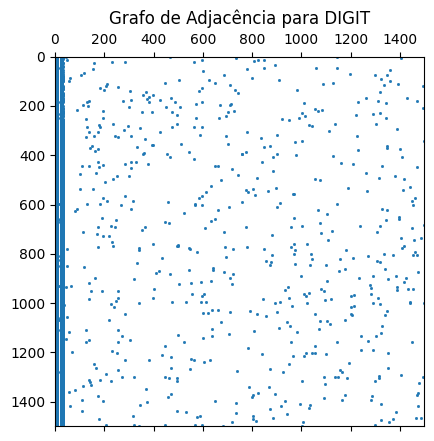

Processando dataset: GC


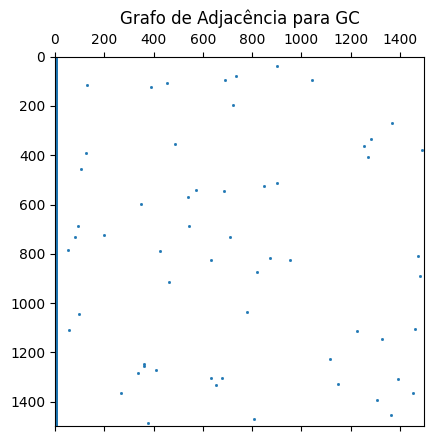

Processando dataset: GN


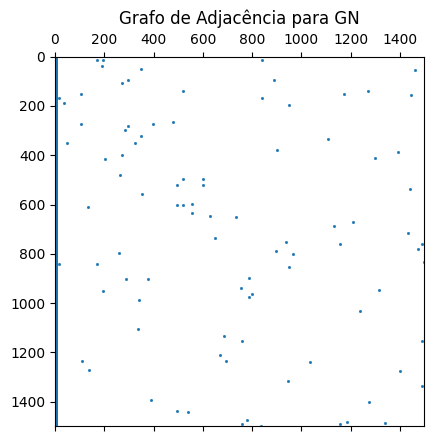

In [24]:
# Criar SNN

k = 5

for dataset_name, dataset in datasets.items():
    print(f"Processando dataset: {dataset_name}")
    
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(dataset['data'])
    distances, indices = nbrs.kneighbors()
    
    shared_distances = np.zeros((len(dataset['data']), len(dataset['data'])))
    for i in range(len(dataset['data'])):
        for j in indices[i]:
            shared_distances[i, j] = np.sum(np.minimum(indices[i] == j, indices[j] == i))
    
    graph = kneighbors_graph(shared_distances, k, mode='connectivity', include_self=False)
    
    # Exibir o grafo de adjacência
    plt.spy(graph, markersize=1)
    plt.title(f"Grafo de Adjacência para {dataset_name}")
    plt.show()

In [25]:
def graphToMatrixCos(graphCos):
    adjacency_matrix = graphCos.toarray()
    cosine_sim_matrix = cosine_similarity(adjacency_matrix)
    weighted_matrix = sp.csr_matrix(cosine_sim_matrix)
    print(weighted_matrix.toarray())

[[1.  0.8 0.8 ... 0.8 0.8 0.6]
 [0.8 1.  0.8 ... 0.8 0.8 0.6]
 [0.8 0.8 1.  ... 0.8 0.8 0.6]
 ...
 [0.8 0.8 0.8 ... 1.  1.  0.8]
 [0.8 0.8 0.8 ... 1.  1.  0.8]
 [0.6 0.6 0.6 ... 0.8 0.8 1. ]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
